### ВЫДЕЛЕНИЕ ИТОГОВОГО НАБОРА ПОЛЕЙ ДЛЯ ОДНОЙ ЗАПИСИ

*Загружаю данные и все необходимые библиотеки*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('brooklyn_sales_map.csv')
data.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
331629,331630,3,BOROUGH PARK,03 THREE FAMILY HOMES,1,5699,40,NaN,C0,1481 58 STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,241.839050,3654.809767
360344,360345,3,BAY RIDGE,14 RENTALS - 4-10 UNIT,2A,6118,4,NaN,S4,9425 5 AVENUE,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,247.681727,1852.056742
133595,133596,3,SHEEPSHEAD BAY,28 COMMERCIAL CONDOS,4,8793,1114,NaN,R5,4078 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102043,102044,3,EAST NEW YORK,03 THREE FAMILY HOMES,1,4034,2,NaN,C0,465 ELTON STREET,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,223.753148,1821.470152
340253,340254,3,DOWNTOWN-FULTON FERRY,13 CONDOS - ELEVATOR APARTMENTS,2,55,1032,NaN,R4,79 BRIDGE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(390883, 111)

*Вывожу информацию о данных на экран*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,390883.0,195442.000000,112838.346973,1.000000,97721.500000,195442.000000,293162.500000,3.908830e+05
borough,390883.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000e+00
block,390883.0,4275.651169,2642.765332,1.000000,1786.000000,4305.000000,6585.000000,8.955000e+03
lot,390883.0,272.509986,484.658837,1.000000,21.000000,45.000000,94.000000,9.133000e+03
easement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
FIRM07_FLA,8653.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
PFIRM15_FL,27773.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
MAPPLUTO_F,303728.0,0.000244,0.036740,0.000000,0.000000,0.000000,0.000000,7.000000e+00
SHAPE_Leng,303728.0,337.445796,329.587401,2.143758,238.997798,249.411350,283.169119,1.986152e+04


In [6]:
for col in data.columns:
    typ=data[col].dtypes
    print('{}-tip:{}'.format(col, typ))

Unnamed: 0-tip:int64
borough-tip:int64
neighborhood-tip:object
building_class_category-tip:object
tax_class-tip:object
block-tip:int64
lot-tip:int64
easement-tip:float64
building_class-tip:object
address-tip:object
apartment_number-tip:object
zip_code-tip:int64
residential_units-tip:int64
commercial_units-tip:int64
total_units-tip:int64
land_sqft-tip:float64
gross_sqft-tip:float64
year_built-tip:int64
tax_class_at_sale-tip:int64
building_class_at_sale-tip:object
sale_price-tip:float64
sale_date-tip:object
year_of_sale-tip:int64
Borough-tip:object
CD-tip:float64
CT2010-tip:float64
CB2010-tip:float64
SchoolDist-tip:float64
Council-tip:float64
ZipCode-tip:float64
FireComp-tip:object
PolicePrct-tip:float64
HealthCent-tip:float64
HealthArea-tip:float64
SanitBoro-tip:float64
SanitDistr-tip:float64
SanitSub-tip:object
Address-tip:object
ZoneDist1-tip:object
ZoneDist2-tip:object
ZoneDist3-tip:object
ZoneDist4-tip:object
Overlay1-tip:object
Overlay2-tip:object
SPDist1-tip:object
SPDist2-tip:obj

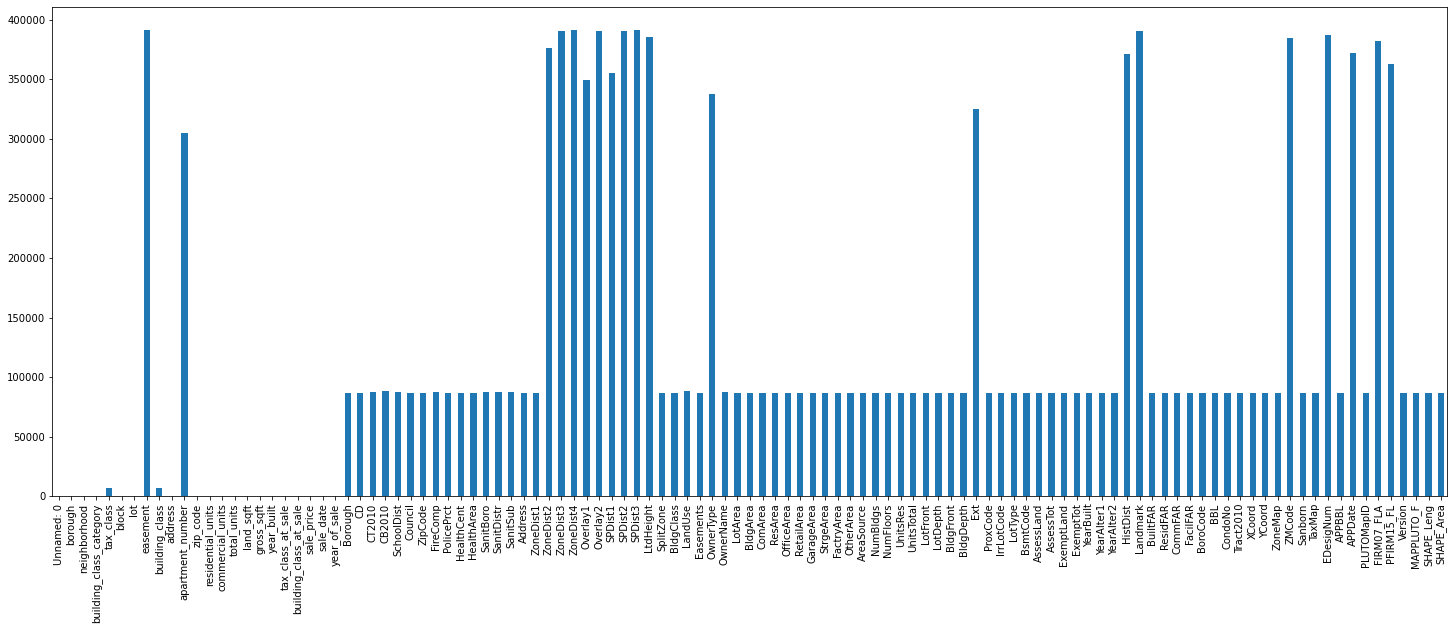

In [7]:
plt.figure(figsize=(25,9))
data.isna().sum().plot(kind='bar')
plt.show();

In [8]:
for col in data.columns:
    missing=np.mean(data[col].isnull())
    missing_non=missing*100
    print('{}-{}%'.format(col, round(missing_non)))
    if missing_non>80:
        del data[col]

Unnamed: 0-0%
borough-0%
neighborhood-0%
building_class_category-0%
tax_class-2%
block-0%
lot-0%
easement-100%
building_class-2%
address-0%
apartment_number-78%
zip_code-0%
residential_units-0%
commercial_units-0%
total_units-0%
land_sqft-0%
gross_sqft-0%
year_built-0%
tax_class_at_sale-0%
building_class_at_sale-0%
sale_price-0%
sale_date-0%
year_of_sale-0%
Borough-22%
CD-22%
CT2010-22%
CB2010-23%
SchoolDist-22%
Council-22%
ZipCode-22%
FireComp-22%
PolicePrct-22%
HealthCent-22%
HealthArea-22%
SanitBoro-22%
SanitDistr-22%
SanitSub-22%
Address-22%
ZoneDist1-22%
ZoneDist2-96%
ZoneDist3-100%
ZoneDist4-100%
Overlay1-89%
Overlay2-100%
SPDist1-91%
SPDist2-100%
SPDist3-100%
LtdHeight-99%
SplitZone-22%
BldgClass-22%
LandUse-23%
Easements-22%
OwnerType-86%
OwnerName-22%
LotArea-22%
BldgArea-22%
ComArea-22%
ResArea-22%
OfficeArea-22%
RetailArea-22%
GarageArea-22%
StrgeArea-22%
FactryArea-22%
OtherArea-22%
AreaSource-22%
NumBldgs-22%
NumFloors-22%
UnitsRes-22%
UnitsTotal-22%
LotFront-22%
LotDepth-

In [9]:
df_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing
        
        top = data[col].describe()['top']
        data[col] = data[col].fillna(top)

imputing missing values for: building_class_category
imputing missing values for: tax_class
imputing missing values for: building_class
imputing missing values for: address
imputing missing values for: apartment_number
imputing missing values for: Borough
imputing missing values for: FireComp
imputing missing values for: SanitSub
imputing missing values for: Address
imputing missing values for: ZoneDist1
imputing missing values for: SplitZone
imputing missing values for: BldgClass
imputing missing values for: OwnerName
imputing missing values for: IrrLotCode
imputing missing values for: ZoneMap
imputing missing values for: Sanborn
imputing missing values for: Version


In [10]:
non_nomic=data.select_dtypes(include=[np.number])
cols_nomic=non_nomic.columns.values
for col in cols_nomic:
    missing=data[col].isnull()
    non_missing=np.sum(missing)
    if non_missing>0:
        print('inputing missing for {}'.format(col))
        data['{}-ismissing'.format(col)]=missing
        med=data[col].median
        data[col]=data[col].fillna(med)

inputing missing for CD
inputing missing for CT2010
inputing missing for CB2010
inputing missing for SchoolDist
inputing missing for Council
inputing missing for ZipCode
inputing missing for PolicePrct
inputing missing for HealthCent
inputing missing for HealthArea
inputing missing for SanitBoro
inputing missing for SanitDistr
inputing missing for LandUse
inputing missing for Easements
inputing missing for LotArea
inputing missing for BldgArea
inputing missing for ComArea
inputing missing for ResArea
inputing missing for OfficeArea
inputing missing for RetailArea
inputing missing for GarageArea
inputing missing for StrgeArea
inputing missing for FactryArea
inputing missing for OtherArea
inputing missing for AreaSource
inputing missing for NumBldgs
inputing missing for NumFloors
inputing missing for UnitsRes
inputing missing for UnitsTotal
inputing missing for LotFront
inputing missing for LotDepth
inputing missing for BldgFront
inputing missing for BldgDepth
inputing missing for ProxCo

In [11]:
data

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,building_class,address,apartment_number,...,CondoNo-ismissing,Tract2010-ismissing,XCoord-ismissing,YCoord-ismissing,TaxMap-ismissing,APPBBL-ismissing,PLUTOMapID-ismissing,MAPPLUTO_F-ismissing,SHAPE_Leng-ismissing,SHAPE_Area-ismissing
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,R5,330 JAY STREET,COURT,...,True,True,True,True,True,True,True,True,True,True
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,G7,85 JAY STREET,4,...,False,False,False,False,False,False,False,False,False,False
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,O6,29 COLUMBIA HEIGHTS,4,...,False,False,False,False,False,False,False,False,False,False
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,K6,5120 AVENUE U,4,...,False,False,False,False,False,False,False,False,False,False
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,H8,21 CLARK STREET,4,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390878,390879,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,C0,364 LINDEN STREET,4,...,False,False,False,False,False,False,False,False,False,False
390879,390880,3,WYCKOFF HEIGHTS,31 COMMERCIAL VACANT LAND,1,3337,19,C0,364 LINDEN STREET,4,...,False,False,False,False,False,False,False,False,False,False
390880,390881,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,Z9,383 HARMAN STREET,4,...,False,False,False,False,False,False,False,False,False,False
390881,390882,3,3004,04 TAX CLASS 1 CONDOS,1,6886,1107,C0,14 BAY 47TH STREET,4,...,True,True,True,True,True,True,True,True,True,True


In [12]:
lbl=LabelEncoder()

In [34]:
df_cat_dummies = pd.get_dummies(df.select_dtypes("object"))

NameError: name 'df' is not defined

### ОТБОР ПРИЗНАКОВ

In [33]:
num_rows = len(data.index)
low_information_cols = [] 

for col in data.columns:
    cnts = data[col].value_counts(dropna=True)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.96:
        del data[col]
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        

IndexError: single positional indexer is out-of-bounds